In [1]:
from netCDF4 import Dataset
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
# Load multiple files at once and getting variable names

print(os.getcwd())
files = ['Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc', 
        'Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc']
nc = nct.open_data(files)
print(nc.variables)

names = ', '.join(files)
print(names)

variable = regex.search(r"(?<=Data/Raw/)[^_]*", names).group()
model = regex.search(r"(?<=Data/Raw/.*?_.*?_)[^_]*", names).group()
experiment = regex.search(r"(?<=Data/Raw/.*?_.*?_.*?_)[^_]*", names).group()

start = 2015
end = 2100

/home/users/zy1921/Practice
['tas']
Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc, Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc


In [3]:
nc.merge("time")
nc.to_nc("Data/{}_{}_{}.nc".format(variable, model, experiment), overwrite = True)

ValueError: b"Warning (cdfInqContents): Coordinates variable time cant be assigned!Warning (cdfInqContents): Coordinates variable time cant be assigned!cdo    mergetime (Abort): Outputfile Data/tas_CESM2_esm-ssp585.nc already exists!"

## Plotting map

### Max/min value for plotting 

In [4]:
file = "Data/{}_{}_{}.nc".format(variable, model, experiment)
nc = Dataset(file)

var = nc.variables [variable][:]
max_var = np.amax(var)
min_var = np.amin(var)

print(max_var)
print(min_var)

323.60443
206.6504


### 2015

In [5]:
data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
data.select(year = start)
data.tmean()
data.to_nc("Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start), overwrite = True)

In [6]:
file = "Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start)
nc = Dataset(file)
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (1,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (288,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (288, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (192,)
filling off, 'lat_bnds': <cl

In [7]:
lat = nc.variables['lat'][:] # [:] means all elements inside the list
lon = nc.variables['lon'][:]
var = nc.variables [variable][:]

mean_var = np.nanmean(var, axis = 0) 
print(mean_var.shape) 

x, y = np.meshgrid(lon, lat)

(192, 288)


shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


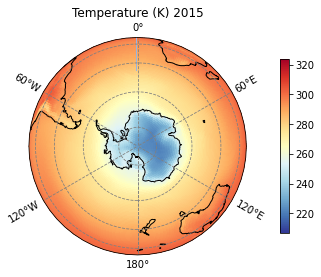

In [8]:
ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude = 0, 
                                                  central_latitude=-90))

plt.title("Temperature (K) {}".format(start))
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)


p = ax.pcolor(x, y, mean_var, vmax = max_var, vmin = min_var, 
              cmap = 'RdYlBu_r', transform = cartopy.crs.PlateCarree() )

cb = plt.colorbar(p, shrink=0.8, pad = 0.1)

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--') 


plt.savefig("output/{}_{}_{}_{}.png".format(variable, model, experiment, start))

plt.show()


In [ ]:
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",
                                             ["aliceblue",
                                              "paleturquoise",
                                              "turquoise",
                                              "dodgerblue",
                                              "yellow",
                                              "red"])

### 2100

In [9]:
data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
data.select(year = end)
data.tmean()
data.to_nc("Data/{}_{}_{}_{}.nc".format(variable, model, experiment, end), overwrite = True)

In [10]:
file = "Data/{}_{}_{}_{}.nc".format(variable, model, experiment, end)
nc = Dataset(file)
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (1,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (288,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (288, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (192,)
filling off, 'lat_bnds': <cl

In [11]:
lat = nc.variables['lat'][:] # [:] means all elements inside the list
lon = nc.variables['lon'][:]
var = nc.variables [variable][:]

mean_var = np.nanmean(var, axis = 0) 
print(mean_var.shape) 

x, y = np.meshgrid(lon, lat)

(192, 288)


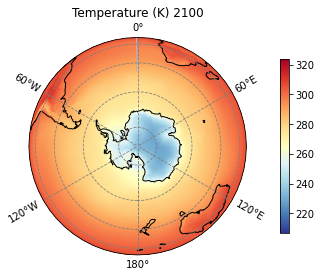

In [12]:
ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude = 0, 
                                                  central_latitude=-90))

plt.title("Temperature (K) {}".format(end))
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)


p = ax.pcolor(x, y, mean_var, vmax = max_var, vmin = min_var, 
              cmap = 'RdYlBu_r', transform = cartopy.crs.PlateCarree() )

cb = plt.colorbar(p, shrink=0.8, pad = 0.1)

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--') 


plt.savefig("output/{}_{}_{}_{}.png".format(variable, model, experiment, end))

plt.show()


## Time series

In [13]:
# Join the two files with time 

data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))

time = data.years
time = tuple(time)
len(time)

86

In [14]:
# Select regions 40S south 

data.crop(lon = [-90, 90], lat = [-90, -30])

data.to_nc("Data/{}_{}_{}_40S.nc".format(variable, model, experiment), overwrite = True)

tas


In [22]:
!cdo -yearmean Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_mean.nc

cdo    yearmean: Processed 1 variable over 1117 timesteps [0.56s 238MB].


In [43]:
!cdo -yearmean Data/tas_projection_40S.nc Data/tas_projection_40S_mean.nc

cdo    yearmean: Processed 1 variable over 1117 timesteps [0.48s 251MB].


In [23]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_mean.nc".format(variable, model, experiment))
print(nc.variables)
var_mean = nc.variables[variable][:,0,0]
print(var_mean.shape)
time_mean= nc.variables['time'][:]

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (86,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (86, 2)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (145,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (145, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (64,)
filling off, 'lat_bnds': <c

In [24]:
!cdo -yearmax Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_max.nc
!cdo -yearmin Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_min.nc

cdo    yearmax: Processed 1 variable over 1117 timesteps [0.52s 238MB].
cdo    yearmin: Processed 1 variable over 1117 timesteps [0.51s 238MB].


In [25]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_min.nc".format(variable, model, experiment))
             
var_min = nc.variables[variable][:,0,0]
time_min= nc.variables['time'][:]

In [27]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_max.nc".format(variable, model, experiment))
             
var_max = nc.variables[variable][:,0,0]
time_max= nc.variables['time'][:]
var_max[1]

246.89543

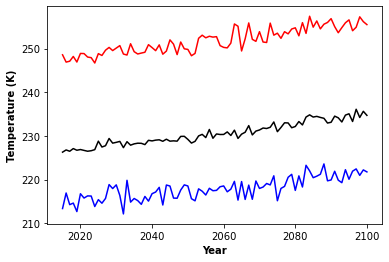

In [33]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
ax.plot(time, var_max, 'r')
ax.plot(time, var_min, 'b')

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Temperature (K)")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection.png".format(variable, model, experiment))

plt.show()